In [2]:
import cv2
import numpy as np

import PIL
import matplotlib.pyplot as plt

In [3]:
image1 = cv2.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_BACK__1514864956159109.jpg')
image2 = cv2.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_BACK_LEFT__1514864956197197.jpg')
image3 = cv2.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_FRONT_LEFT__1514864956138205.jpg')
image4 = cv2.imread('../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_FRONT__1514864956220368.jpg')
image5 = cv2.imread("../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_FRONT_RIGHT__1514864966493989.jpg")
image6 = cv2.imread("../data/NUsample/n003-2018-01-02-11-48-43+0800__CAM_BACK_RIGHT__1514864936124954.jpg")

In [4]:
def plot_grid(images):
    fig, axs = plt.subplots(2, 2)
    for i, ax in enumerate(axs.flat):
        ax.imshow(images[i])
        ax.set_axis_off()
    plt.show()

IndexError: list index out of range

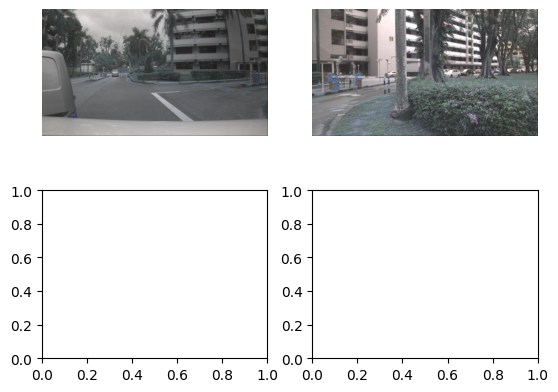

In [5]:
plot_grid([image1, image2])

In [ ]:
height, width = image1.shape[:2]

src_pts1 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)
src_pts2 = np.array([[0, 300], [width, 300], [0, 450], [width, 450]], dtype=np.float32)
src_pts3 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)
src_pts4 = np.array([[0, 300], [width, 300], [0, height], [width, height]], dtype=np.float32)

dst_pts = np.array([[0, 0], [width, 0], [0, height], [width, height]], dtype=np.float32)

M1 = cv2.getPerspectiveTransform(src_pts1, dst_pts)
M2 = cv2.getPerspectiveTransform(src_pts2, dst_pts)
M3 = cv2.getPerspectiveTransform(src_pts3, dst_pts)
M4 = cv2.getPerspectiveTransform(src_pts4, dst_pts)

warped_image1 = cv2.warpPerspective(image1, M1, (width, height))
warped_image2 = cv2.warpPerspective(image2, M2, (width, height))
warped_image3 = cv2.warpPerspective(image3, M3, (width, height))
warped_image4 = cv2.warpPerspective(image4, M4, (width, height))

plt.imshow(warped_image1), plt.show()
plt.imshow(warped_image2), plt.show()
plt.imshow(warped_image3), plt.show()
plt.imshow(warped_image4), plt.show()

NameError: name 'image1' is not defined

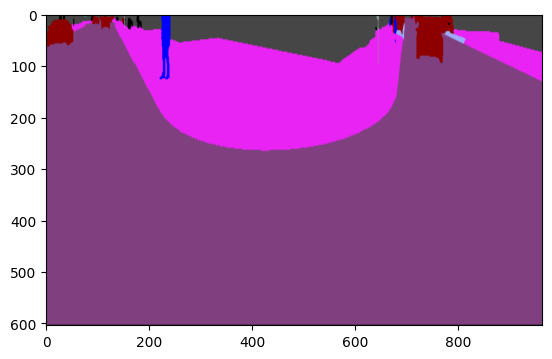

In [ ]:
plt.imshow(warped_image1)

In [ ]:
plt.imshow(warped_image2)

NameError: name 'plt' is not defined

In [ ]:
crop1 = image1[:, 1000:]

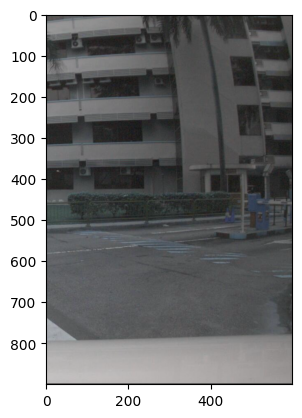

In [ ]:
plt.imshow(crop1)

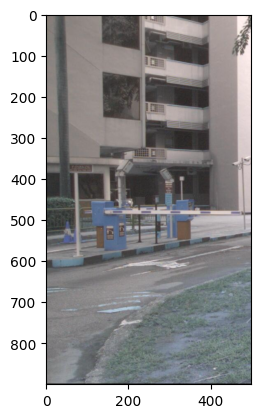

In [ ]:
crop2 = image2[:, :500]
plt.imshow(crop2)

In [ ]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [ ]:
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(crop1, None)
keypoints2, descriptors2 = sift.detectAndCompute(crop2, None)

In [ ]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50) # or pass empty dictionary

In [ ]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [ ]:
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

In [ ]:
matchesMask = [[0,0] for i in range(len(matches))]

In [ ]:
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7 *n.distance:
        matchesMask[i]=[1,0]

In [ ]:
draw_params = dict(matchColor = (0,255,0),
    singlePointColor = (255,0,0),
    matchesMask = matchesMask,
    flags = cv2.DrawMatchesFlags_DEFAULT)

good_matches = []
for m,n in matches:
    if m.distance <0.7 * n.distance:
        good_matches.append(m)
 
img3 = cv2.drawMatchesKnn(crop1,keypoints1, crop2,keypoints2,matches,None,**draw_params)
 
plt.imshow(img3,),plt.show()

NameError: name 'matchesMask' is not defined

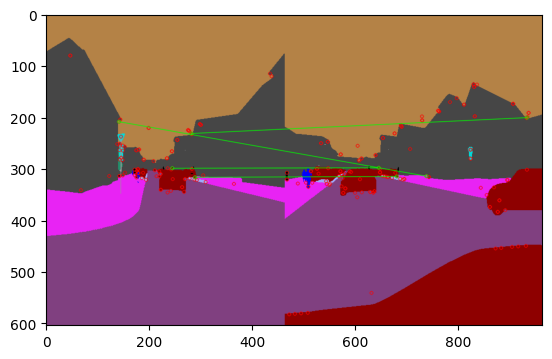

(<matplotlib.image.AxesImage at 0x14b5cd3a0>, None)

In [ ]:
draw_params = dict(matchColor = (0,255,0),
    singlePointColor = (255,0,0),
    matchesMask = matchesMask,
    flags = cv2.DrawMatchesFlags_DEFAULT)

good_matches = []
for m,n in matches:
    if m.distance < 0.6 * n.distance:
        good_matches.append(m)
 
img3 = cv2.drawMatchesKnn(crop1,keypoints1, crop2,keypoints2,matches,None,**draw_params)
 
plt.imshow(img3,),plt.show()

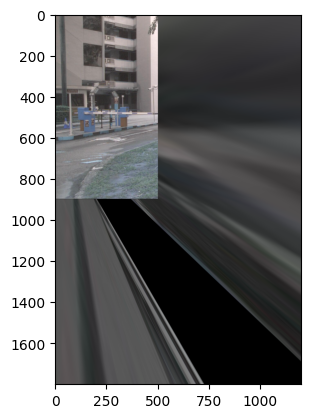

(<matplotlib.image.AxesImage at 0x16a5a52b0>, None)

In [ ]:
src_points = np.float32([keypoints1[match.queryIdx].pt for match in good_matches]).reshape(-1, 1, 2)
dst_points = np.float32([keypoints2[match.trainIdx].pt for match in good_matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_points, dst_points, cv2.RANSAC, 5)

# Use homography to warp images
h, w, _ = crop1.shape
panorama = cv2.warpPerspective(crop1, M, (w*2, h*2))


# Place the second image into the panorama
panorama[0:crop2.shape[0], 0:crop2.shape[1]] = crop2
img4 = panorama

plt.imshow(img4), plt.show()

In [ ]:
cv2.__version__

'4.9.0'

In [ ]:
stitcher = cv2.Stitcher.create(mode = 1)
stitcher.setPanoConfidenceThresh(0.1)
# stitcher.set
# stitcher.setChannels(1)

In [ ]:
dir(stitcher)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'composePanorama',
 'compositingResol',
 'create',
 'estimateTransform',
 'interpolationFlags',
 'panoConfidenceThresh',
 'registrationResol',
 'seamEstimationResol',
 'setCompositingResol',
 'setInterpolationFlags',
 'setPanoConfidenceThresh',
 'setRegistrationResol',
 'setSeamEstimationResol',
 'setWaveCorrection',
 'stitch',
 'waveCorrection',
 'workScale']

In [ ]:
left = crop1.copy()
plt.imshow(stitcher.stitch([left, crop2], np.array([src_points, dst_points]))[1])

NameError: name 'crop1' is not defined

In [ ]:
left = crop1.copy()
stitched_image = stitcher.composePanorama([left, crop2], np.array([src_points, dst_points]))

NameError: name 'crop1' is not defined

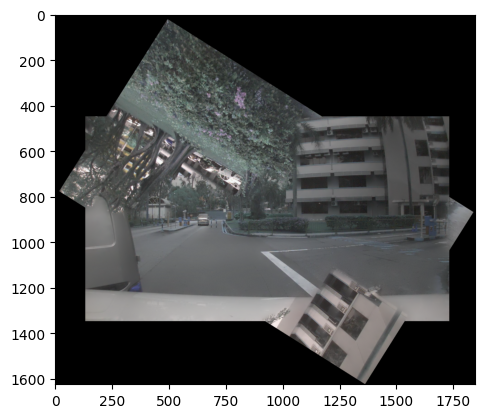

In [ ]:
left = image1.copy()

plt.imshow(stitcher.stitch([left, image2])[1])

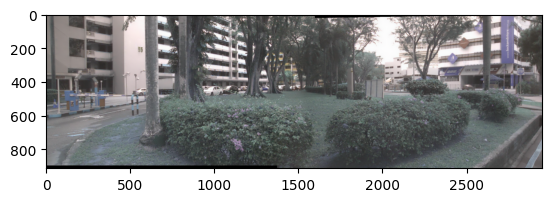

In [ ]:
stitcher = cv2.Stitcher.create(mode = 1)
stitcher.setPanoConfidenceThresh(0.4)

left = image1.copy()
plt.imshow(stitcher.stitch([left, image2, image3, image4, image5, image6])[1])

In [ ]:
stitcher = cv2.Stitcher.create(mode = 1)
stitcher.setPanoConfidenceThresh(0.2)

plt.imshow(stitcher.stitch([image3, image4, image5])[1])

In [ ]:
stitcher = cv2.Stitcher.create(mode = 1)
stitcher.setPanoConfidenceThresh(0.8)

plt.imshow(stitcher.stitch([image6, image1, image2])[1])

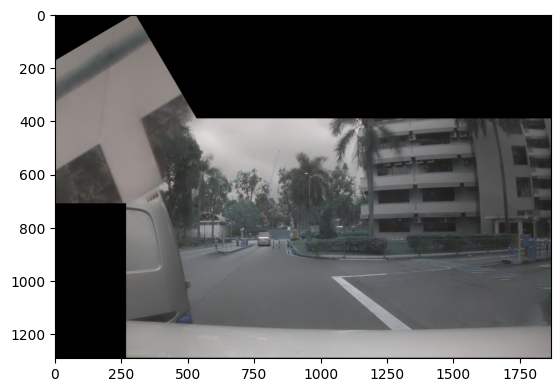

In [ ]:
stitcher = cv2.Stitcher.create(mode = 1)
stitcher.setPanoConfidenceThresh(0.15)

plt.imshow(stitcher.stitch([image1, image2])[1])

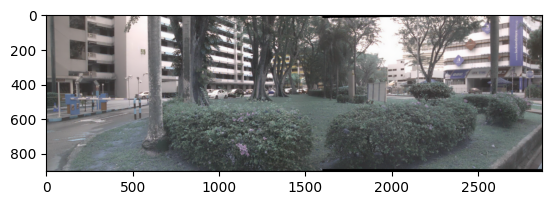

In [ ]:
stitcher = cv2.Stitcher.create(mode = 1)
stitcher.setPanoConfidenceThresh(0.4)

left = image1.copy()
plt.imshow(stitcher.stitch([image2, image3, image4])[1])

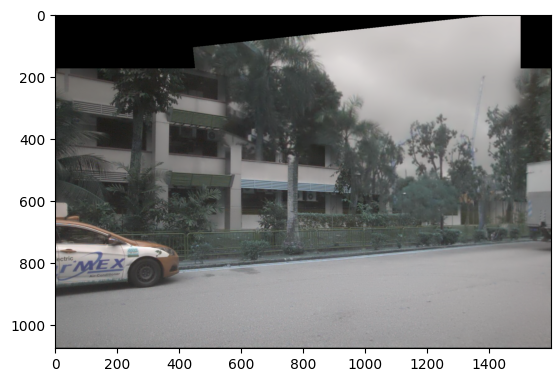

In [13]:
stitcher = cv2.Stitcher.create(mode = 1)
stitcher.setPanoConfidenceThresh(0.4)

left = image1.copy()
plt.imshow(stitcher.stitch([image5, image6, image1])[1])

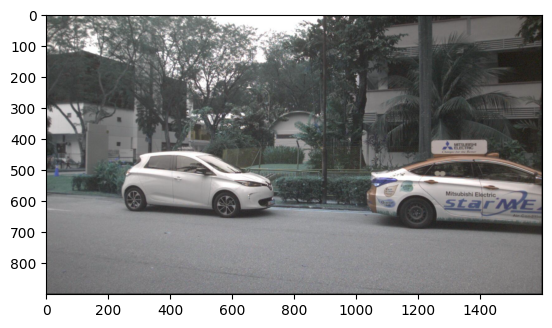

In [7]:
plt.imshow(image5)

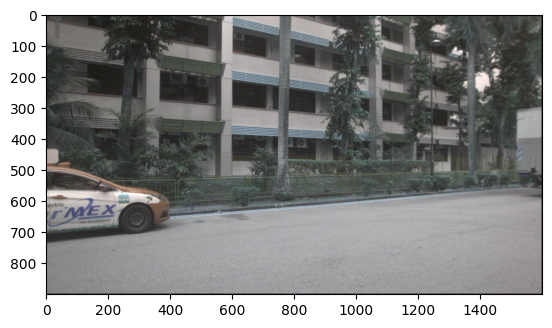

In [14]:
plt.imshow(image6)

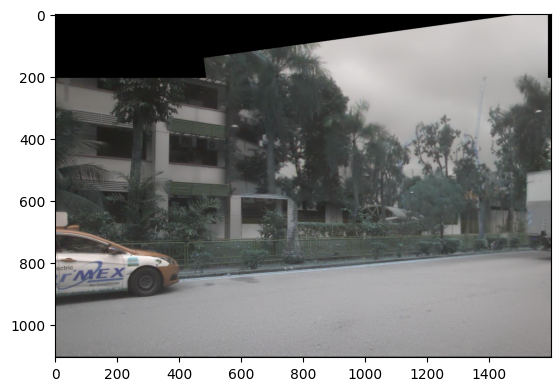

In [12]:
stitcher = cv2.Stitcher.create(mode = 1)
stitcher.setPanoConfidenceThresh(0.2)

left = image1.copy()
plt.imshow(stitcher.stitch([image6, image5, image1])[1])